**Importing The Libraries**

In [ ]:
!pip install tensorflow_decision_forests
!pip install tf_keras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_USE_LEGACY_KERAS']='1'
import tensorflow as tf
import tf_keras
import tensorflow_decision_forests as tfdf

**Loading the Dataset**

In [ ]:
dataset=pd.read_csv('Data-RF - Sheet1.csv')
dataset_df = dataset[['Lab-Test1(30)', 'Lab-Test2(24)', 'Midsem Test (90)', 'Attendance','Grade']]

**Visualize Scatter Plot**

In [ ]:
X1=dataset['Lab-Test1(30)']
X2=dataset['Lab-Test2(24)']
X3=dataset['Midsem Test (90)']
y=dataset['Grade']

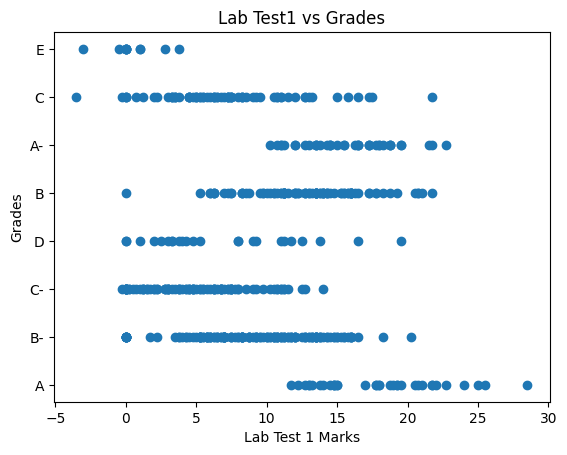

In [ ]:
plt.scatter(X1,y)
plt.title('Lab Test1 vs Grades')
plt.xlabel('Lab Test 1 Marks')
plt.ylabel('Grades')
plt.show()

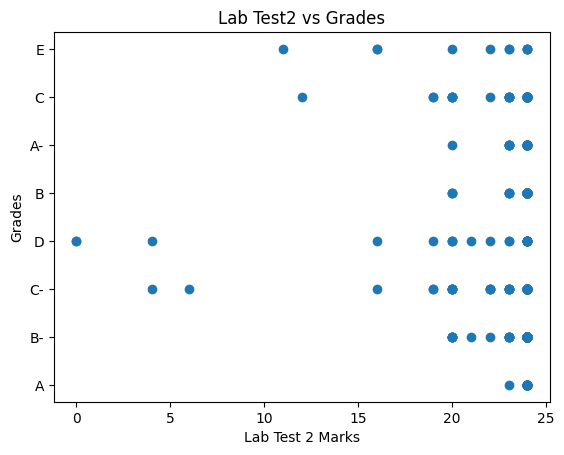

In [ ]:
plt.scatter(X2,y)
plt.title('Lab Test2 vs Grades')
plt.xlabel('Lab Test 2 Marks')
plt.ylabel('Grades')
plt.show()

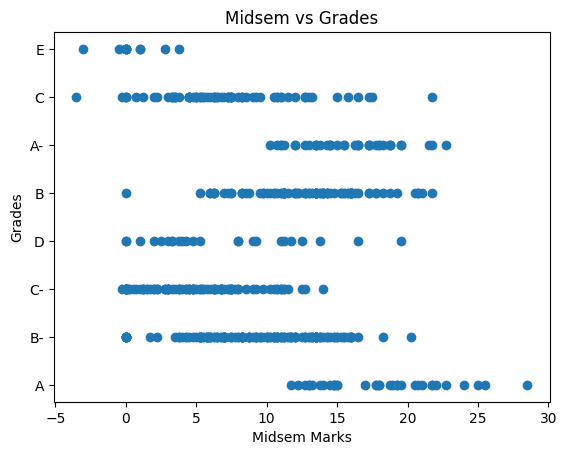

In [ ]:
plt.scatter(X1,y)
plt.title('Midsem vs Grades')
plt.xlabel('Midsem Marks')
plt.ylabel('Grades')
plt.show()

**Encoding the Categorical Data**

In [ ]:
label1='Grade'
classes1=dataset_df[label1].unique().tolist()
dataset_df[label1]=dataset_df[label1].map(classes1.index)
label2='Attendance'
classes2=dataset_df[label2].unique().tolist()
dataset_df[label2]=dataset_df[label2].map(classes2.index)

<ipython-input-18-b77745e88136>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[label1]=dataset_df[label1].map(classes1.index)
<ipython-input-18-b77745e88136>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_df[label2]=dataset_df[label2].map(classes2.index)


In [ ]:
dataset_df

,Lab-Test1(30),Lab-Test2(24),Midsem Test (90),Attendance,Grade
0,13.00,24,66.0,0,0
1,15.00,24,67.0,0,0
2,5.25,24,45.0,0,1
3,2.75,19,34.0,0,2
4,7.25,24,30.0,0,2
...,...,...,...,...,...
495,10.50,24,48.0,1,1
496,11.00,24,31.0,2,6
497,11.75,24,47.0,0,1
498,0.00,20,0.0,1,7


**Splitting the data into train and test set**

In [ ]:
def split_dataset(dataset,test_ratio=0.3):
  test_indices=np.random.rand(len(dataset))<test_ratio
  return dataset[~test_indices],dataset[test_indices]

train_ds_pd, test_ds_pd = split_dataset(dataset_df)

**Train The Random Forest Model**

In [ ]:
# Convert Pandas DataFrame to TensorFlow dataset
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label="Grade")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label="Grade")
# Initialize and fit the model
model = tfdf.keras.RandomForestModel(
    verbose=2, categorical_algorithm="CART", num_trees=30, max_depth=16)
model.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmpcirl55fw as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Attendance': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>}
Label: Tensor("data_4:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Attendance': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_3:0' shape=(None,) 

[INFO 24-02-12 16:15:30.1311 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 16:15:30.1312 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 16:15:30.1313 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 16:15:30.1318 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 16:15:30.1318 UTC kernel.cc:392] Number of examples: 346
[INFO 24-02-12 16:15:30.1319 UTC kernel.cc:792] Training dataset:
Number of records: 346
Number of columns: 5

Number of columns by type:
	NUMERICAL: 4 (80%)
	CATEGORICAL: 1 (20%)

Columns:

NUMERICAL: 4 (80%)
	0: "Attendance" NUMERICAL mean:0.225434 min:0 max:2 sd:0.538721
	1: "Lab-Te

Model trained in 0:00:00.103536
Compiling model...
Model compiled.


**Accuracy and Logloss Graphs for 30 trees**

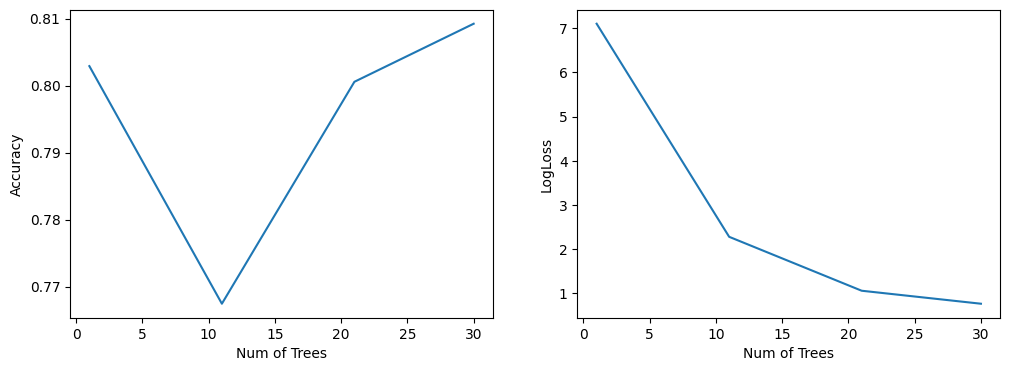

In [ ]:
logs=model.make_inspector().training_logs()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot([log.num_trees for log in logs],[log.evaluation.accuracy for log in logs])
plt.xlabel("Num of Trees")
plt.ylabel("Accuracy")
plt.subplot(1,2,2)
plt.plot([log.num_trees for log in logs],[log.evaluation.loss for log in logs])
plt.xlabel("Num of Trees")
plt.ylabel("LogLoss")
plt.show()

**Visulaizing the tree**

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model,tree_idx=0,max_depth=3)

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model,tree_idx=1,max_depth=3)

**Gradient Boost DT**

In [ ]:
# Import Gradient Boosted Decision Trees model
from tensorflow_decision_forests.keras import GradientBoostedTreesModel

# Initialize and fit the Gradient Boosted Trees model
gbdt_model = GradientBoostedTreesModel(
    verbose=2, categorical_algorithm="CART", num_trees=30, max_depth=16)
gbdt_model.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmp7f9g12q4 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'Lab-Test1(30)': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'Lab-Test2(24)': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'Midsem_Test_(90)': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Attendance': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>}
Label: Tensor("data_4:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'Lab-Test1(30)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'Lab-Test2(24)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'Midsem_Test_(90)': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'Attendance': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_3:0' shape=(None,) 

[INFO 24-02-12 16:15:47.3444 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-02-12 16:15:47.3444 UTC kernel.cc:772] Collect training examples
[INFO 24-02-12 16:15:47.3444 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-02-12 16:15:47.3446 UTC kernel.cc:391] Number of batches: 1
[INFO 24-02-12 16:15:47.3446 UTC kernel.cc:392] Number of examples: 346
[INFO 24-02-12 16:15:47.3446 UTC kernel.cc:792] Training dataset:
Number of records: 346
Number of columns: 5

Number of columns by type:
	NUMERICAL: 4 (80%)
	CATEGORICAL: 1 (20%)

Columns:

NUMERICAL: 4 (80%)
	0: "Attendance" NUMERICAL mean:0.225434 min:0 max:2 sd:0.538721
	1: "Lab-Te

Model trained in 0:00:03.503375
Compiling model...
Model compiled.


**Visualizing Gradient Boost DT**

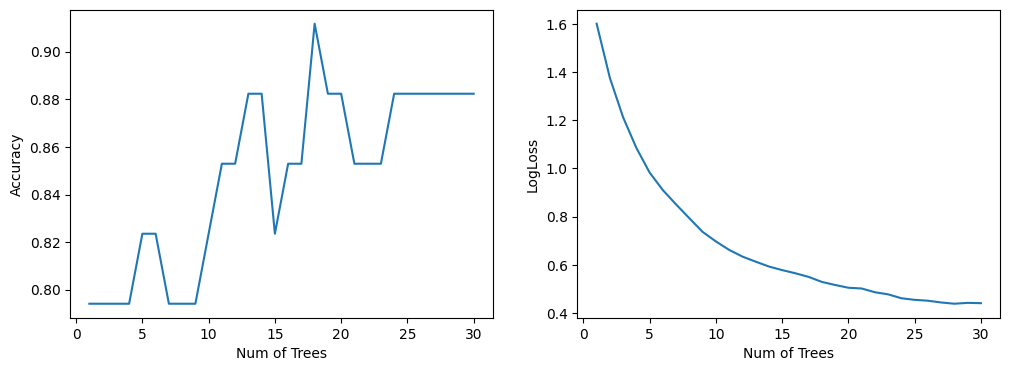

In [ ]:
logs=gbdt_model.make_inspector().training_logs()
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot([log.num_trees for log in logs],[log.evaluation.accuracy for log in logs])
plt.xlabel("Num of Trees")
plt.ylabel("Accuracy")
plt.subplot(1,2,2)
plt.plot([log.num_trees for log in logs],[log.evaluation.loss for log in logs])
plt.xlabel("Num of Trees")
plt.ylabel("LogLoss")
plt.show()

**Acuracy Of Gradient Boost and Random Forest**

In [ ]:
#RF
print("Accuracy and Loss for Random forest Model")
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_ds, return_dict=True)
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")
#GBDT
print("Accuracy and Loss for Gradient Boost Decision Tree Model")
gbdt_model.compile(metrics=["accuracy"])
evaluationx = gbdt_model.evaluate(test_ds, return_dict=True)
for name, value in evaluationx.items():
  print(f"{name}: {value:.4f}")

Accuracy and Loss for Random forest Model
1/1 [==============================] - 15s 15s/step - loss: 0.0000e+00 - accuracy: 0.8506
loss: 0.0000
accuracy: 0.8506
Accuracy and Loss for Gradient Boost Decision Tree Model
1/1 [==============================] - 1s 791ms/step - loss: 0.0000e+00 - accuracy: 0.8701
loss: 0.0000
accuracy: 0.8701


**Comparison and Hypertuning (GBDT)**

In [ ]:
# Initialize hyperparameters
num_trees = [10, 30, 50, 100]
max_depth = [8, 16, 32]

# Dictionary to store results
results = {}

# Iterate over different hyperparameter values
for trees in num_trees:
    for depth in max_depth:
        # Initialize and fit the Random Forest model
        modelx = GradientBoostedTreesModel(
            verbose=0, categorical_algorithm="CART", num_trees=trees, max_depth=depth)
        modelx.fit(train_ds)

        # Evaluate the model on the test dataset and directly capture the accuracy
        modelx.compile(metrics=["accuracy"])
        evaluation_comp = modelx.evaluate(test_ds, return_dict=True)
        accuracy = evaluation_comp["accuracy"]
        # Store results
        results[(trees, depth)] = accuracy

# Find hyperparameters leading to accuracy >= 85%
optimal_hyperparams = [(trees, depth) for (trees, depth), accuracy in results.items() if accuracy >= 0.85]
print("Hyperparameters leading to accuracy >= 85%:", optimal_hyperparams)

# Print results
for (trees, depth), accuracy in results.items():
    print(f"Num Trees: {trees}, Max Depth: {depth}, Accuracy: {accuracy}")

# Find impact of num_trees on accuracy
trees_accuracy = [accuracy for (trees, depth), accuracy in results.items() if trees == optimal_hyperparams[0][0]]
print("Impact of Num Trees on Accuracy:", trees_accuracy)

# Find impact of max_depth on accuracy
depth_accuracy = [accuracy for (trees, depth), accuracy in results.items() if depth == optimal_hyperparams[0][1]]
print("Impact of Max Depth on Accuracy:", depth_accuracy)


1/1 [==============================] - 0s 248ms/step - loss: 0.0000e+00 - accuracy: 0.8766
Hyperparameters leading to accuracy >= 85%: [(30, 8), (30, 16), (30, 32), (50, 8), (50, 16), (50, 32), (100, 8), (100, 16), (100, 32)]
Num Trees: 10, Max Depth: 8, Accuracy: 0.8116883039474487
Num Trees: 10, Max Depth: 16, Accuracy: 0.8051947951316833
Num Trees: 10, Max Depth: 32, Accuracy: 0.8051947951316833
Num Trees: 30, Max Depth: 8, Accuracy: 0.8636363744735718
Num Trees: 30, Max Depth: 16, Accuracy: 0.8701298832893372
Num Trees: 30, Max Depth: 32, Accuracy: 0.8701298832893372
Num Trees: 50, Max Depth: 8, Accuracy: 0.8636363744735718
Num Trees: 50, Max Depth: 16, Accuracy: 0.8766233921051025
Num Trees: 50, Max Depth: 32, Accuracy: 0.8766233921051025
Num Trees: 100, Max Depth: 8, Accuracy: 0.8636363744735718
Num Trees: 100, Max Depth: 16, Accuracy: 0.8766233921051025
Num Trees: 100, Max Depth: 32, Accuracy: 0.8766233921051025
Impact of Num Trees on Accuracy: [0.8636363744735718, 0.87012988328